# Lecture 1 - Introduction to Digital Image

In this notebook, we will introduce the following fundamentals in handling digital images:
1. Digital Images and Scikit-image
1. Sampling and Quantization
1. Image Types
1. Color Spaces

The contents of this notebook is compiled from the following references:

- C Alis,*"Introduction to Digital Image"*, IIP 2018

Organized by:
Benjur Emmanuel L. Borja

---

## 1. Digital Images and Scikit-image
There are multiple libraries in handling video and image processing in Python. OpenCV, for example, is currently the most versatile library in terms of real-time computer vision applications. However, since we will be discussing the mathematical formulations of the different algorithms that we will tackle, we will rely on the called scikit-image (or skimage) and numpy to build our functions.

In [1]:
import numpy as np
from skimage.io import imshow, imread

As discussed in class, digital images (as described by the name) are digital representations of images. They are often represented by a two-dimensional matrix of cell values called pixels. This means that we can look at the matrix representations of any image that we can handle.  For example, first we open an image, and display it as an image.

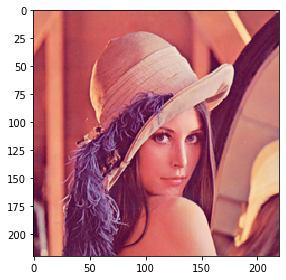

In [5]:
lena = imread('lena.png')
imshow(lena);

However, if we call the image object directly, without using the image display wrapper, then what we receive instead is the matrix representation that we were just talking about.  Notice however that, rather than the aforementioned two-dimensional matrix, we actually have a three-dimensional image.  This is because images actually have multiple channels.  This refers to the image colour spaces, but more on that later.

In [3]:
lena

Array([[[225, 137, 127],
        [224, 137, 127],
        [227, 134, 119],
        ...,
        [227, 141, 128],
        [232, 150, 124],
        [213, 120, 104]],

       [[225, 137, 127],
        [224, 136, 127],
        [227, 134, 119],
        ...,
        [230, 144, 130],
        [238, 155, 126],
        [219, 124, 105]],

       [[227, 137, 122],
        [224, 134, 118],
        [228, 133, 117],
        ...,
        [209, 113, 106],
        [189,  97,  96],
        [149,  61,  80]],

       ...,

       [[ 90,  28,  60],
        [ 95,  29,  61],
        [ 97,  28,  63],
        ...,
        [126,  42,  68],
        [148,  58,  73],
        [158,  59,  73]],

       [[ 87,  24,  61],
        [ 92,  27,  62],
        [ 95,  25,  61],
        ...,
        [143,  58,  78],
        [167,  67,  80],
        [169,  65,  78]],

       [[ 84,  22,  58],
        [ 95,  29,  62],
        [ 93,  24,  59],
        ...,
        [159,  67,  84],
        [176,  70,  81],
        [182,  71,  80]]

## Sampling and Quantization

When stored on a computer, the value in each pixel is also quantized into discrete values. Thus, images in the physical world, which are analog, have to be sampled and quantized for them to be digitized.  Sampling involves taking the value of the image at regular spatial intervals. The length of the intervals define the spatial resolution of the image.  Quantization involves discretizing the intensity values of the analog image. The number of bits $k$ used to represent an intensity value is known as its bit depth.

### Sampling
Let's try sampling the analog image of a circle. We define `N` as the number of pixels per side of the image. The larger the `N`, the denser the points are and the better the resolution.

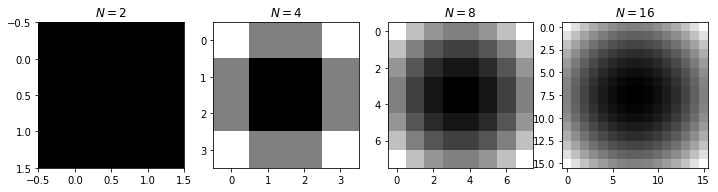

In [11]:
def circle_image(x, y):
    X, Y = np.meshgrid(x, y)
    return X**2 + Y**2

Ns = 2**np.arange(1, 5)
fig, ax = plt.subplots(1, len(Ns), figsize=(12, 4))
for i, N in enumerate(Ns):
    image = circle_image(np.linspace(-1, 1, num=N), np.linspace(-1, 1, num=N))
    ax[i].imshow(image,cmap='gray')
    ax[i].set_title(r'$N = %d$' % N)

Now we apply this process as we try (down)sampling a digital photo.

In [6]:
from skimage.io import imread
from skimage.transform import downscale_local_mean

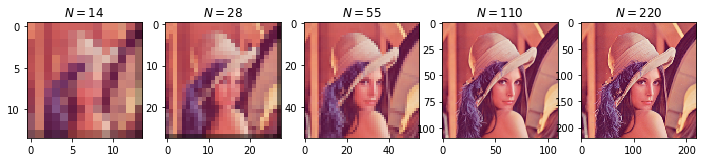

In [14]:
factors = 2**np.arange(0, 5)
fig, ax = plt.subplots(1, len(factors), figsize=(12, 4))
for i,factor in enumerate(factors):
    image = downscale_local_mean(lena, 
                                 factors=(factor, factor, 1)).astype(int)
    ax_num = len(factors) - i - 1
    ax[ax_num].imshow(image)
    ax[ax_num].set_title(r'$N=%d$' % image.shape[0])

### Quantization

First, we again demonstrate it on the analog image.

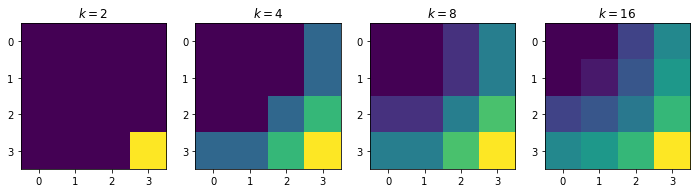

In [15]:
def circle_image(x, y):
    X, Y = np.meshgrid(x, y)
    return X**2 + Y**2

ks = 2**np.arange(1, 5)
circ_image = circle_image(np.linspace(0, 1, num=4), 
                          np.linspace(0, 1, num=4))
fig, ax = plt.subplots(1, len(ks), figsize=(12, 4))
for i, k in enumerate(ks):
    bins = np.linspace(0, circ_image.max(), k)
    image = np.digitize(circ_image, bins)
    image = np.vectorize(bins.tolist().__getitem__)(image-1)
    ax[i].imshow(image)
    ax[i].set_title(r'$k = %d$' % k)

Now, we do the same for our sample image, Lena.

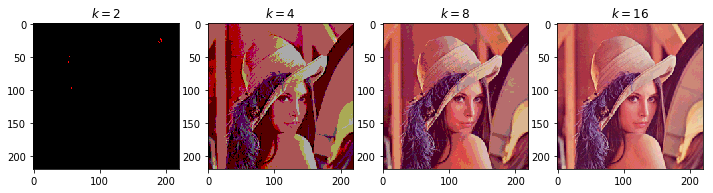

In [16]:
ks = 2**np.arange(1, 5)
fig, ax = plt.subplots(1, len(ks), figsize=(12, 4))
for i, k in enumerate(ks):
    bins = np.linspace(0, lena.max(), k)
    image = np.digitize(lena, bins)
    image = np.vectorize(bins.tolist().__getitem__)(image-1).astype(int)
    ax[i].imshow(image)
    ax[i].set_title(r'$k = %d$' % k)

# Converting between image types

To convert a color image to grayscale, we compute its luminance or intensity values.

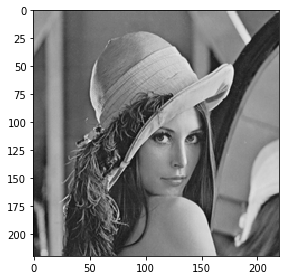

In [17]:
from skimage.color import rgb2gray
lena_gray = rgb2gray(lena)
imshow(lena_gray);

To convert a grayscale image to monochrome or binary image, we apply thresholding such that pixel values that are less than the threshold will be changed to the minimum allowed value (0) and those that are above the threshold will be replaced by the maximum allowed value (1.0 or 255).

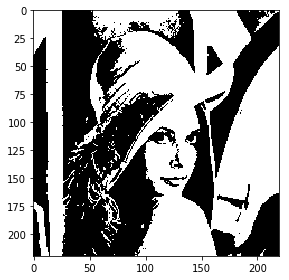

In [18]:
from skimage import img_as_uint
# for this demo, set threshold to average value
lena_binary = img_as_uint(lena_gray > lena_gray.mean())
imshow(lena_binary);

Each pixel of a monochrome image can be represented as a single bit. However, Python still represents them as at least one byte so, representation-wise, monochrome images are indistinguishable from grayscale images.

To convert a grayscale image into color (in RGB space), we look up the RGB value of each gray value.

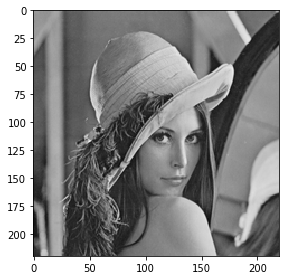

In [19]:
from skimage.color import gray2rgb
lena_color = gray2rgb(lena_gray)
imshow(lena_color);

# Color spaces

Earlier, we had mentioned how images have a third dimension (channels) which pertains to the colour space.  In the most simplistic sense, each channel in a colour space is a mapping of the image values onto a single primary colour in that colour space.  By default, a color image is represented in RGB space. The last coordinate picks a color channel.

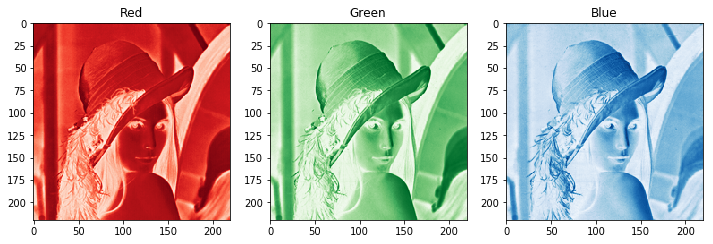

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(lena[:,:,0], cmap='Reds')
ax[0].set_title('Red')
ax[1].imshow(lena[:,:,1], cmap='Greens')
ax[1].set_title('Green')
ax[2].imshow(lena[:,:,2], cmap='Blues')
ax[2].set_title('Blue');

An alternative colour space to RGB is HSV.  To convert from RGB to HSV, call `rgb2hsv`.

In [21]:
from skimage.color import rgb2hsv
lena_hsv = rgb2hsv(lena)

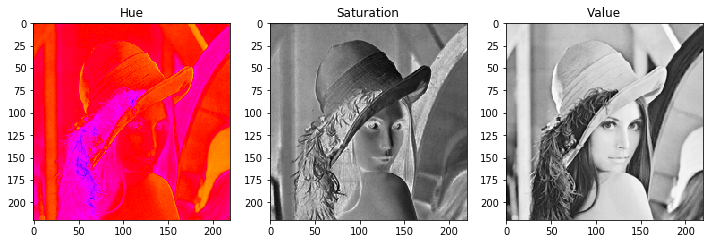

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(lena_hsv[:,:,0], cmap='hsv')
ax[0].set_title('Hue')
ax[1].imshow(lena_hsv[:,:,1], cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(lena_hsv[:,:,2], cmap='gray')
ax[2].set_title('Value');

To convert an image in HSV space back to RGB, call `hsv2rgb`.

In [24]:
from skimage.color import hsv2rgb
lena_rgb = hsv2rgb(lena_hsv)

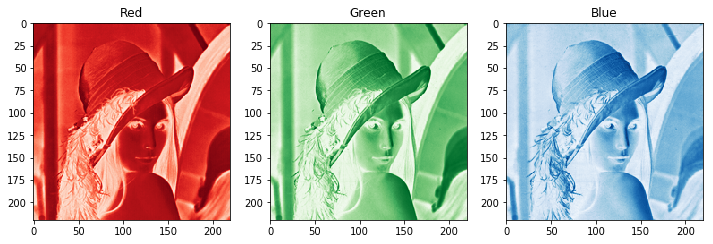

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(lena_rgb[:,:,0], cmap='Reds')
ax[0].set_title('Red')
ax[1].imshow(lena_rgb[:,:,1], cmap='Greens')
ax[1].set_title('Green')
ax[2].imshow(lena_rgb[:,:,2], cmap='Blues')
ax[2].set_title('Blue');